### Practical (3A)
### Aim: Demonstrate data imputation with statistical technique on numerical values and write down the conclusion about the assumption

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
x = df.drop(columns=["Survived"])    #independent columns
x

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [7]:
y = df["Survived"]   #dependent columns
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
df.shape

(891, 4)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
x_train.shape

(712, 3)

In [12]:
x_test.shape

(179, 3)

In [13]:
#Mean and median for age
mean_age = x_train["Age"].mean()   
median_age = x_train["Age"].median()

In [14]:
mean_age

29.78590425531915

In [15]:
median_age

28.75

In [16]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [17]:
#Mean and median for fare
mean_fare = x_train["Fare"].mean()   
median_fare = x_train["Fare"].median()

In [18]:
print("Mean fare:", mean_fare)

Mean fare: 32.617596893491076


In [19]:
print("Median fare:\n", median_fare)

Median fare:
 14.4583


In [20]:
x_train["Age_mean"]=x_train["Age"].fillna(mean_age)
x_train["Age_median"]=x_train["Age"].fillna(median_age)

In [21]:
x_train

,Age,Fare,Family,Age_mean,Age_median
30,40.0,27.7208,0,40.000000,40.00
10,4.0,16.7000,2,4.000000,4.00
873,47.0,9.0000,0,47.000000,47.00
182,9.0,31.3875,6,9.000000,9.00
876,20.0,9.8458,0,20.000000,20.00
...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00
584,NaN,8.7125,0,29.785904,28.75
493,71.0,49.5042,0,71.000000,71.00
527,NaN,221.7792,0,29.785904,28.75


In [22]:
#mean and median for fare
mean_fare = x_train["Fare"].mean()   
median_fare = x_train["Fare"].median()

In [23]:
mean_fare

32.617596893491076

In [24]:
median_fare

14.4583

In [25]:
x_train["Fare_mean"]=x_train["Fare"].fillna(mean_fare)
x_train["Fare_median"]=x_train["Fare"].fillna(median_fare)

In [26]:
print("Before imputation variance of age",x_train["Age"].var())
x_train

Before imputation variance of age 204.3495133904614


,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [27]:
print("Before imputation variance of age",x_train["Age"].var())
print("After imputation variance of mean_age",x_train["Age_mean"].var())
print("After imputation variance of median_age",x_train["Age_median"].var())

Before imputation variance of age 204.3495133904614
After imputation variance of mean_age 161.81262452718673
After imputation variance of median_age 161.9895663346054


In [37]:
(x_train["Age_mean"].var()/x_train["Age"].var())*100

79.18424753867792

In [29]:
print("Before imputation variance of age",x_train["Fare"].var())
print("After imputation variance of mean_age",x_train["Fare_mean"].var())
print("After imputation variance of median_age",x_train["Fare_median"].var())

Before imputation variance of age 2448.197913706318
After imputation variance of mean_age 2324.2385256705547
After imputation variance of median_age 2340.0910219753637


In [36]:
(x_train["Fare_mean"].var()/x_train["Fare"].var())*100

94.93670886075948

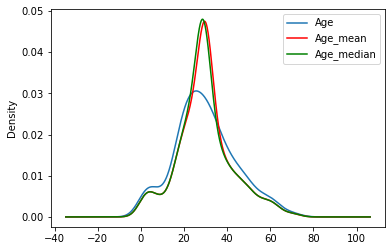

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Age'].plot(kind = 'kde', ax = ax) #Original Distribution
#After imputation with mean
x_train['Age_mean'].plot(kind = 'kde', ax = ax, color = 'red')
#After imputation with median
x_train['Age_median'].plot(kind = 'kde', ax = ax, color = 'green')

#adding legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

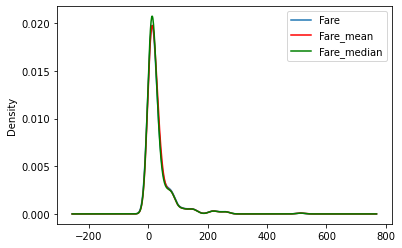

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Fare'].plot(kind = 'kde', ax = ax) #Original Distribution
#After imputation with mean
x_train['Fare_mean'].plot(kind = 'kde', ax = ax, color = 'red')
#After imputation with median
x_train['Fare_median'].plot(kind = 'kde', ax = ax, color = 'green')

#adding legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [41]:
imputer1 = SimpleImputer(strategy="mean")
imputer2 = SimpleImputer(strategy="median")

In [44]:
trf = ColumnTransformer([
    ('imputer1',imputer1,["Age"]),
    ('imputer2',imputer2,["Age"]),
],remainder="passthrough")

In [45]:
trf.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [47]:
trf.named_transformers_["imputer1"].statistics_

array([29.69911765])

In [48]:
trf.named_transformers_["imputer2"].statistics_

array([28.])

 ### Conclusion: 
 ### Thus by analysing both the columns of the table we can conclude that the Age column has null values greater than 5% while Fare column has null values in the range of 5%. So therefore, we can fill the missing values of Fare column by using statistical method while age column won't be use for imputation.